In [ ]:
#%ls

In [ ]:
##pip install holidays

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('data/caso_zc_hmo.zip')
features.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,02/01/2016 00:00,225.622,7.3,0.0,49.0,3.2
1,02/01/2016 01:00,213.620,6.6,0.0,54.0,4.0
2,02/01/2016 02:00,207.360,5.8,0.0,60.0,5.2
3,02/01/2016 03:00,201.374,5.0,0.0,67.0,5.6
4,02/01/2016 04:00,199.018,4.4,0.0,69.0,6.0


In [8]:
features['Date'] = pd.to_datetime(features.Date, format="%d/%m/%Y %H:%M")


In [9]:
features['weekday_name']= features['Date'].dt.day_name()
features['year']= features['Date'].dt.year
features['month']= features['Date'].dt.month
features['day']= features['Date'].dt.day
features['hour']= features['Date'].dt.hour

In [10]:
import pandas as pd
#from datetime import date
import datetime
#from datetime import datetime


In [11]:
#for date, name in sorted(holidays.MX(years=2021).items()):
#    print(date, name)

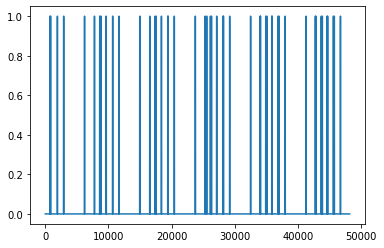

In [12]:
#features['Holiday'] = features['Date'].isin(festivos)
#features['Holiday']= features['Holiday'].astype(int)

import holidays
festivos = list(holidays.MEX(years=[2016, 2017, 2018, 2019, 2020, 2021]).keys())
features['Holiday'] = 1
features.Holiday.where(features.Date.dt.date.isin(festivos), 0, inplace=True)
features.Holiday.plot()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
features

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,weekday_name,year,month,day,hour,Holiday
0,2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2,Saturday,2016,1,2,0,0
1,2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0,Saturday,2016,1,2,1,0
2,2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2,Saturday,2016,1,2,2,0
3,2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6,Saturday,2016,1,2,3,0
4,2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0,Saturday,2016,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48158,2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0,Wednesday,2021,6,30,19,0
48159,2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4,Wednesday,2021,6,30,20,0
48160,2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0,Wednesday,2021,6,30,21,0
48161,2021-06-30 22:00:00,783.028,28.2,0.0,73.5,2.8,Wednesday,2021,6,30,22,0


In [15]:
print('The shape of our features is:', features.shape)


The shape of our features is: (48163, 12)


In [16]:
features.index = features.Date
features.drop(columns='Date', inplace=True)

features=features[features.index.year > 2019]
features

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,weekday_name,year,month,day,hour,Holiday
Date,,,,,,,,,,,
2020-01-01 00:00:00,249.893,12.5,0.0,87.0,3.6,Wednesday,2020,1,1,0,1
2020-01-01 01:00:00,242.423,12.8,0.0,87.0,4.4,Wednesday,2020,1,1,1,1
2020-01-01 02:00:00,239.377,12.8,0.0,87.0,5.2,Wednesday,2020,1,1,2,1
2020-01-01 03:00:00,234.618,12.2,0.0,87.0,5.6,Wednesday,2020,1,1,3,1
2020-01-01 04:00:00,227.685,12.1,0.0,87.0,6.0,Wednesday,2020,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0,Wednesday,2021,6,30,19,0
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4,Wednesday,2021,6,30,20,0
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0,Wednesday,2021,6,30,21,0


In [17]:
# Descriptive statistics for each column
features.describe()

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,year,month,day,hour,Holiday
count,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000
mean,535.384212,24.828110,0.033808,40.294688,3.903673,2020.330921,5.519311,15.706483,11.500724,0.031081
std,247.845627,8.582088,0.394411,21.598018,3.101244,0.470563,3.307342,8.786860,6.922217,0.173543
min,206.951000,1.600000,0.000000,0.130000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000
25%,326.639000,18.000000,0.000000,23.000000,1.761340,2020.000000,3.000000,8.000000,6.000000,0.000000
50%,438.812000,25.000000,0.000000,37.000000,3.120090,2020.000000,5.000000,16.000000,12.000000,0.000000
75%,733.275500,31.100000,0.000000,55.000000,5.200000,2021.000000,8.000000,23.000000,17.500000,0.000000
max,1234.047000,45.500000,16.300000,100.000000,35.000000,2021.000000,12.000000,31.000000,23.000000,1.000000


In [18]:
count_nan = len(features) - features.count()
print(count_nan) 


Demand             0
Temperature        0
PrecipIntensity    0
Humidity           0
WindSpeed          0
weekday_name       0
year               0
month              0
day                0
hour               0
Holiday            0
dtype: int64


In [19]:
# One-hot encode the data using pandas get_dummies
#features=pd.get_dummies(features, columns=['weekday_name'])
features = pd.get_dummies(features)
features

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,year,month,day,hour,Holiday,weekday_name_Friday,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
Date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,249.893,12.5,0.0,87.0,3.6,2020,1,1,0,1,0,0,0,0,0,0,1
2020-01-01 01:00:00,242.423,12.8,0.0,87.0,4.4,2020,1,1,1,1,0,0,0,0,0,0,1
2020-01-01 02:00:00,239.377,12.8,0.0,87.0,5.2,2020,1,1,2,1,0,0,0,0,0,0,1
2020-01-01 03:00:00,234.618,12.2,0.0,87.0,5.6,2020,1,1,3,1,0,0,0,0,0,0,1
2020-01-01 04:00:00,227.685,12.1,0.0,87.0,6.0,2020,1,1,4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0,2021,6,30,19,0,0,0,0,0,0,0,1
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4,2021,6,30,20,0,0,0,0,0,0,0,1
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0,2021,6,30,21,0,0,0,0,0,0,0,1


In [ ]:
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,year,month,day,hour,Holiday,weekday_name_Friday,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
Date,,,,,,,,,,,,
2020-01-01 00:00:00,2020,1,1,0,1,0,0,0,0,0,0,1
2020-01-01 01:00:00,2020,1,1,1,1,0,0,0,0,0,0,1
2020-01-01 02:00:00,2020,1,1,2,1,0,0,0,0,0,0,1
2020-01-01 03:00:00,2020,1,1,3,1,0,0,0,0,0,0,1
2020-01-01 04:00:00,2020,1,1,4,1,0,0,0,0,0,0,1


In [20]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Demand'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Demand', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [22]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (9845, 16)
Training Labels Shape: (9845,)
Testing Features Shape: (3282, 16)
Testing Labels Shape: (3282,)


In [88]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
# criterion='mae'
rf = RandomForestRegressor(n_estimators = 200, criterion='mse', random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [89]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'mw')

Mean Absolute Error: 17.19 mw


In [93]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mape: ', np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Mape:  3.110159247736036
Accuracy: 96.89 %.


In [72]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [92]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, criterion='mae', max_depth = 7)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [91]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Temperature          Importance: 0.72
Variable: month                Importance: 0.21
Variable: hour                 Importance: 0.03
Variable: day                  Importance: 0.02
Variable: Humidity             Importance: 0.01
Variable: year                 Importance: 0.01
Variable: PrecipIntensity      Importance: 0.0
Variable: WindSpeed            Importance: 0.0
Variable: Holiday              Importance: 0.0
Variable: weekday_name_Friday  Importance: 0.0
Variable: weekday_name_Monday  Importance: 0.0
Variable: weekday_name_Saturday Importance: 0.0
Variable: weekday_name_Sunday  Importance: 0.0
Variable: weekday_name_Thursday Importance: 0.0
Variable: weekday_name_Tuesday Importance: 0.0
Variable: weekday_name_Wednesday Importance: 0.0


In [95]:
# New random forest with only the six most important variables
rf_most_important = RandomForestRegressor(n_estimators= 250, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Temperature'), feature_list.index('month'), feature_list.index('hour'), feature_list.index('day'), feature_list.index('Humidity'), feature_list.index('year')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'mw')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Mape: ', np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 20.49 mw
Mape:  3.9205908080536345
Accuracy: 96.08 %.


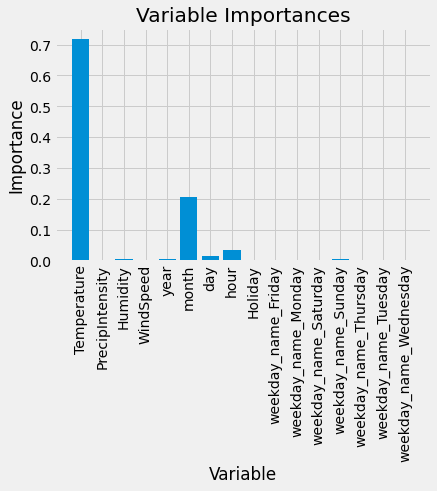

In [96]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

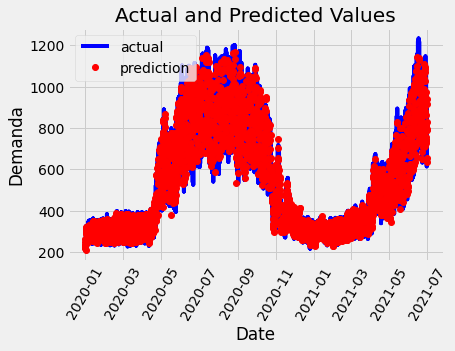

In [97]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Demanda'); plt.title('Actual and Predicted Values');